In [17]:
import numpy as np
import sympy as sm
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from prettytable import PrettyTable

In [18]:
x = sm.Symbol('x')
y = sm.Symbol('y')


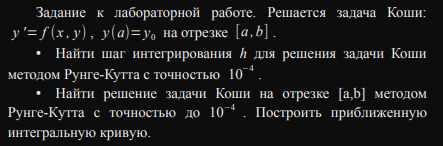
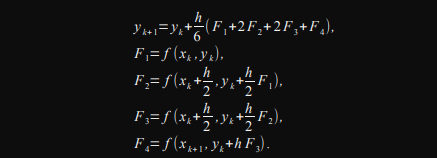

In [19]:
f = (-y + sm.ln(x)*y**2)/x
a = 1
b = 2.6
y1 = 1
eps = 0.0001

In [20]:
def H_R(a, b, eps):
  h = pow(eps, 1/4)
  n = int((b-a)/h)
  if n%2:
    n+=1
  return n, h

In [21]:
N, H = H_R(a, b, eps)
print("Шан интегрирования: " + str(H))
print("Число шагов: " + str(N))

Шан интегрирования: 0.1
Число шагов: 16


In [22]:
def runge_kutta(f):
  global a, b, eps
  n, h = H_R(a, b, eps)
  Y = []
  Y.append(y1)
  Xs = []
  Xs.append(a)
  X = np.linspace(a + h, b, int(n))
  
  for k in range(0, len(X) - 1):
    F1 = f.evalf(subs={x: X[k], y: Y[k]})
    F2 = f.evalf(subs={x: X[k] + h/2, y: Y[k] + (h/2)*F1}) 
    F3 = f.evalf(subs={x: X[k] + h/2, y: Y[k] + (h/2)*F2})
    F4 = f.evalf(subs={x: X[k], y: Y[k]})
    Y.append(Y[k] + (h/6)*(F1 + 2*F2 + 2*F3 + F4))
    Xs.append(X[k])
  return Xs, Y

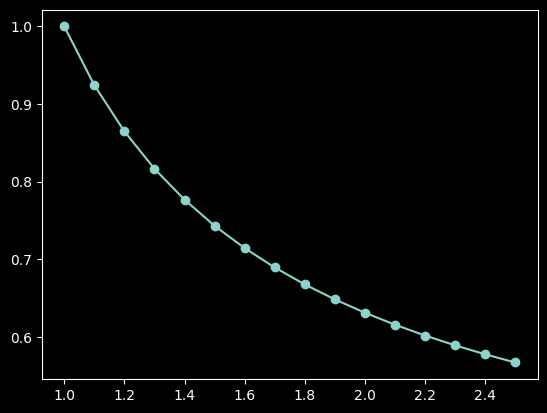

In [23]:
X, Y = runge_kutta(f)
plt.plot(X, Y)
plt.scatter(X, Y)

In [24]:
def HN(X):
  return X[1]-X[0], X.size

In [25]:
def runge_kutta2(f, X, y0, borders=(1,2.6)):
  h, n = HN(X)
  a, b = borders
  Y = np.zeros(n)
  Y[0] = y0

  for k in range(1, n):
    F1 = f.evalf(subs={x: X[k-1], y: Y[k-1]})
    F2 = f.evalf(subs={x: X[k-1] + h/2, y: Y[k-1] + (h/2)*F1}) 
    F3 = f.evalf(subs={x: X[k-1] + h/2, y: Y[k-1] + (h/2)*F2})
    F4 = f.evalf(subs={x: X[k], y: Y[k-1]+h*F3})
    Y[k] = (Y[k-1] + (h/6)*(F1 + 2*F2 + 2*F3 + F4))
  return Y

In [26]:
def getX(a, b, n):
  X = np.zeros(n)
  h = (b-a)/n
  for i in range(n):
    X[i] = a + h * i
  return X

In [27]:
X = getX(a, b, N)
X2 = getX(a, b, N//2)
rk_Y = runge_kutta2(f, X, y1)
rk_Y2 = runge_kutta2(f, X2, y1)

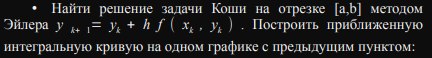


In [28]:
def euler(f, X, y1, borders=(1,2.6)):
  h, n = HN(X)
  x0 = borders[0]
  Y = np.zeros(n)
  Y[0] = y1
  for i in range(n-1):
    X[i] = x0 + h * i
    Y[i+1] = Y[i] + h * f.evalf(subs={x: X[i], y: Y[i]})
  X[n-1] = x0 + h * (n-1)
  return Y

In [29]:
eu_Y = euler(f, X, y1)
eu_Y2 = euler(f, X2, y1)

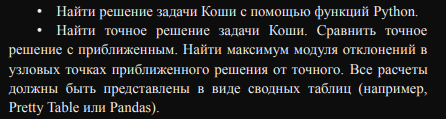

In [30]:
def getF(x, y):
  return (-y + math.log1p(x)*y**2)/x

In [31]:
sc_Y = odeint(getF, y1, X)
sc_Y2 = odeint(getF, y1, X2)

In [32]:
tilda_Y = np.zeros(N)
for i in range(1, N, 3):
  tilda_Y[i] = eu_Y2[i//2] 

solve_Y = np.zeros(N)
for i in range(1, N, 3):
  solve_Y[i] = sc_Y2[i//2] 

table_eu = PrettyTable()

table_eu.add_column('x', X)
table_eu.add_column('y_eu', eu_Y)
table_eu.add_column('y_eu tilda', tilda_Y)
table_eu.add_column('delta_eu', np.abs(tilda_Y - solve_Y))

print(table_eu)

+--------------------+---------------------+--------------------+---------------------+
|         x          |         y_eu        |     y_eu tilda     |       delta_eu      |
+--------------------+---------------------+--------------------+---------------------+
|        1.0         |         1.0         |        0.0         |         0.0         |
|        1.1         |  0.8999999999999999 |        1.0         |         0.0         |
| 1.2000000000000002 |  0.8252001132401365 |        0.0         |         0.0         |
| 1.3000000000000003 |  0.7667795052262789 |        0.0         |         0.0         |
| 1.4000000000000004 |  0.7196624111098703 | 0.6861142993913553 |  0.2139495441146504 |
| 1.5000000000000004 |  0.6807053586902276 |        0.0         |         0.0         |
| 1.6000000000000005 |  0.647850083141529  |        0.0         |         0.0         |
| 1.7000000000000006 |  0.6196885214724458 | 0.6107258649385003 | 0.27443630536433206 |
| 1.8000000000000007 |  0.595222

In [33]:
tilda_Y = np.zeros(N)
for i in range(1, N, 3):
  tilda_Y[i] = rk_Y2[i//2] 

table_rk = PrettyTable()

table_rk.add_column('x', X)
table_rk.add_column('y_rk', eu_Y)
table_rk.add_column('y_rk tilda', tilda_Y)
table_rk.add_column('delta_rk', np.abs(tilda_Y - solve_Y))

print(table_rk)

+--------------------+---------------------+--------------------+---------------------+
|         x          |         y_rk        |     y_rk tilda     |       delta_rk      |
+--------------------+---------------------+--------------------+---------------------+
|        1.0         |         1.0         |        0.0         |         0.0         |
|        1.1         |  0.8999999999999999 |        1.0         |         0.0         |
| 1.2000000000000002 |  0.8252001132401365 |        0.0         |         0.0         |
| 1.3000000000000003 |  0.7667795052262789 |        0.0         |         0.0         |
| 1.4000000000000004 |  0.7196624111098703 | 0.7482283674919534 | 0.15183547601405223 |
| 1.5000000000000004 |  0.6807053586902276 |        0.0         |         0.0         |
| 1.6000000000000005 |  0.647850083141529  |        0.0         |         0.0         |
| 1.7000000000000006 |  0.6196885214724458 | 0.6802600994045532 | 0.20490207089827916 |
| 1.8000000000000007 |  0.595222

In [34]:
table = PrettyTable()

table.add_column('x', X)
table.add_column('Эйлер', eu_Y)
table.add_column('Ринге-Кутт', rk_Y)
table.add_column('Python', sc_Y)
print(table)

+--------------------+---------------------+--------------------+--------------+
|         x          |        Эйлер        |     Ринге-Кутт     |    Python    |
+--------------------+---------------------+--------------------+--------------+
|        1.0         |         1.0         |        1.0         |     [1.]     |
|        1.1         |  0.8999999999999999 | 0.9129830011397542 | [0.97017041] |
| 1.2000000000000002 |  0.8252001132401365 | 0.8457930581114053 | [0.94274526] |
| 1.3000000000000003 |  0.7667795052262789 | 0.7921637774612877 | [0.9188992]  |
| 1.4000000000000004 |  0.7196624111098703 | 0.7482378891296869 | [0.90006384] |
| 1.5000000000000004 |  0.6807053586902276 | 0.7115076013298733 | [0.88804616] |
| 1.6000000000000005 |  0.647850083141529  | 0.6802697916110587 | [0.88516217] |
| 1.7000000000000006 |  0.6196885214724458 | 0.6533258638848597 | [0.89434863] |
| 1.8000000000000007 |  0.5952226440240324 | 0.6298068958804345 | [0.91917267] |
| 1.9000000000000008 |  0.57

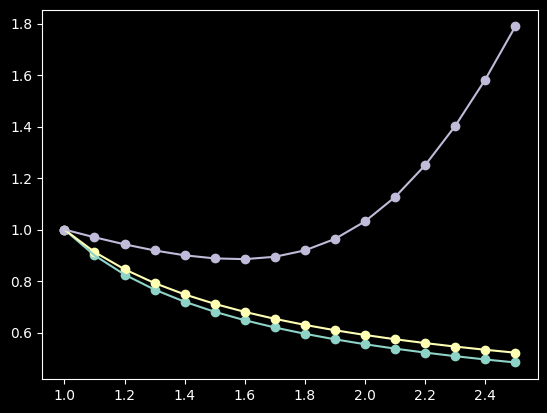

In [35]:
fig, ax = plt.subplots() 
ax.scatter(X, eu_Y)
ax.plot(X, eu_Y)
ax.scatter(X, rk_Y)
ax.plot(X, rk_Y)
ax.scatter(X, sc_Y)
ax.plot(X, sc_Y)